<a href="https://colab.research.google.com/github/theQuert/ipyfun/blob/master/IP_110753204_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Class:** 資碩計一
\
**ID:** 110753204
\
**Name:** 李昱廷

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/NCCU/110_2/DIP/HW2

/content/drive/MyDrive/NCCU/110_2/DIP/HW2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from google.colab.patches import cv2_imshow
from PIL import *

#### 1.

(20%) Use binary morphological operations to 
\
1) fix the image shown below (“text-
broken.tif”)
\
I've tried four methods: Erosion, Dilatoin, Closing, Morphological Gradient.
- Erosion: Discard pixels nearby the boundary of object
- Dilation: `
- Closing: 
- Morphological Gradient: 

In [ ]:
img_1 = cv2.imread('text-broken.tif')

In [ ]:
# erosion
# kernel = np.ones((5,5),np.uint8)
# erosion_img_1 = cv2.erode(img_1,kernel,iterations = 1)
# cv2_imshow(erosion_img_1)

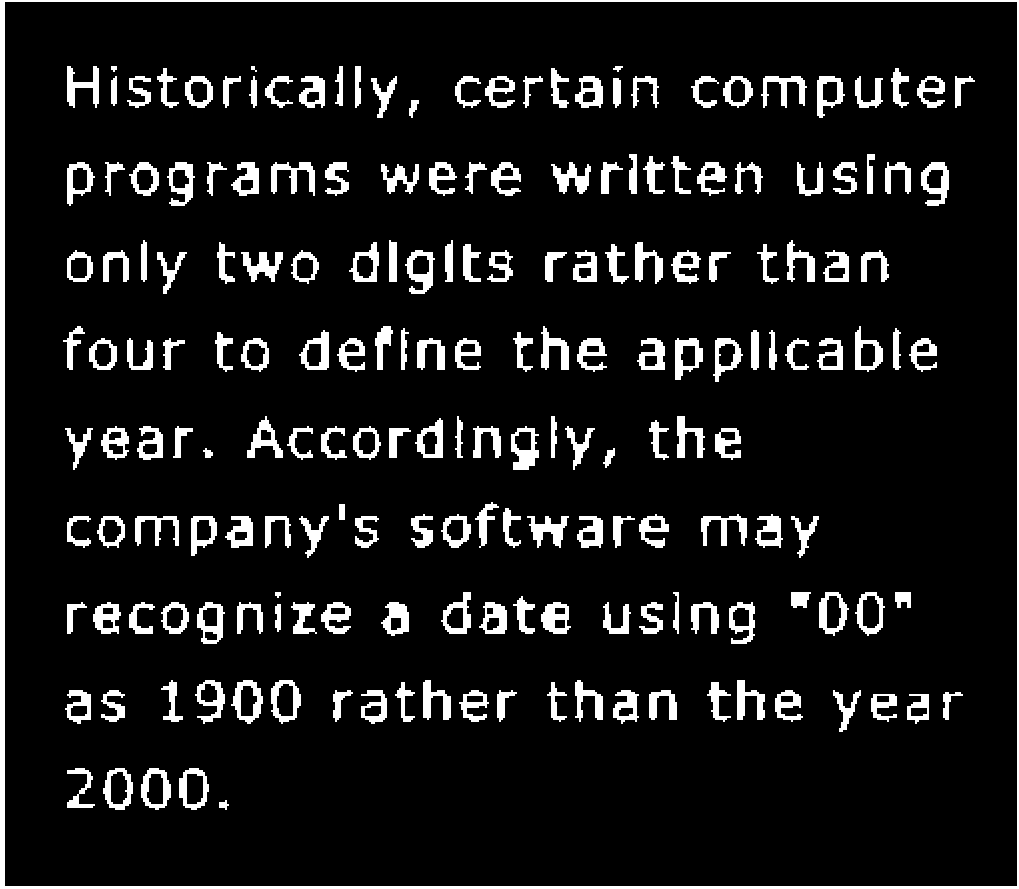

In [ ]:
# closing
kernel = np.ones((5,5), np.uint8)
closing_img_1 = cv2.morphologyEx(img_1, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing_img_1)

In [ ]:
# # opening
# kernel = np.ones((5,5), np.uint8)
# opening_img_1 = cv2.morphologyEx(img_1, cv2.MORPH_OPEN, kernel)
# cv2_imshow(opening_img_1)

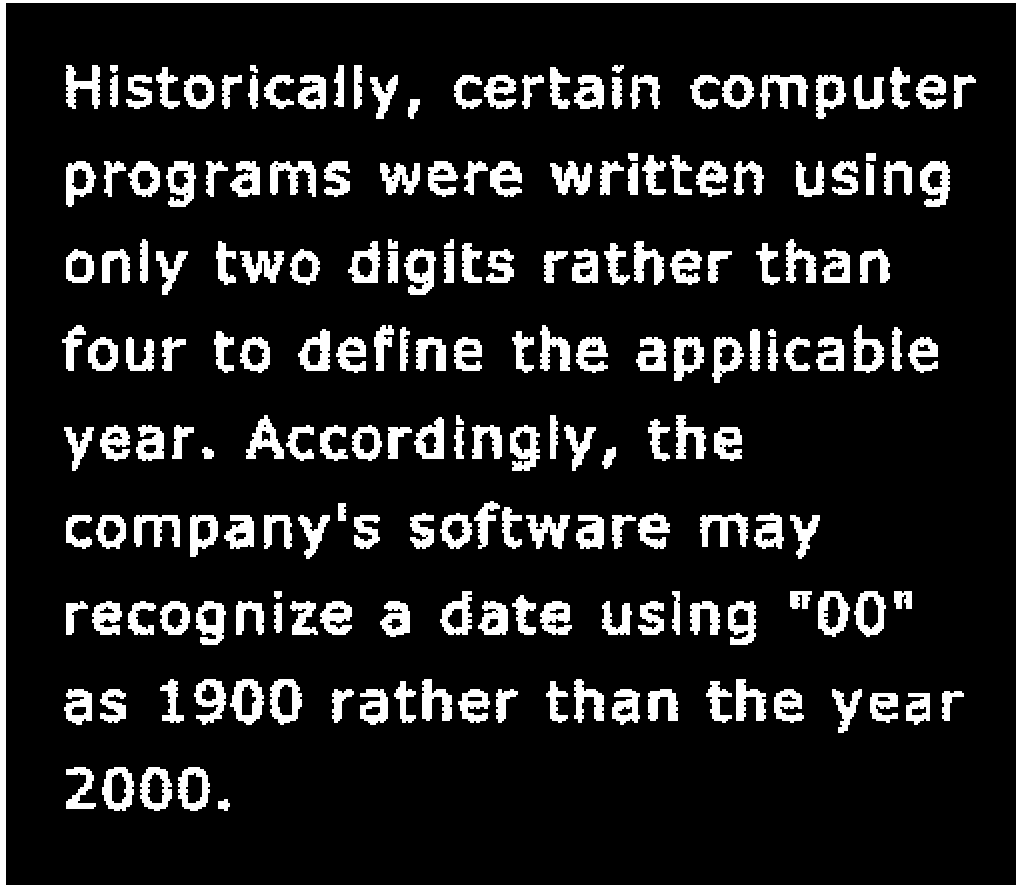

In [ ]:
# The output of dilation method
kernel = np.ones((3,3), np.uint8)
dilation_img_1 = cv2.dilate(img_1,kernel,iterations = 1)
cv2_imshow(dilation_img_1)

(2) find the boundaries of each characters


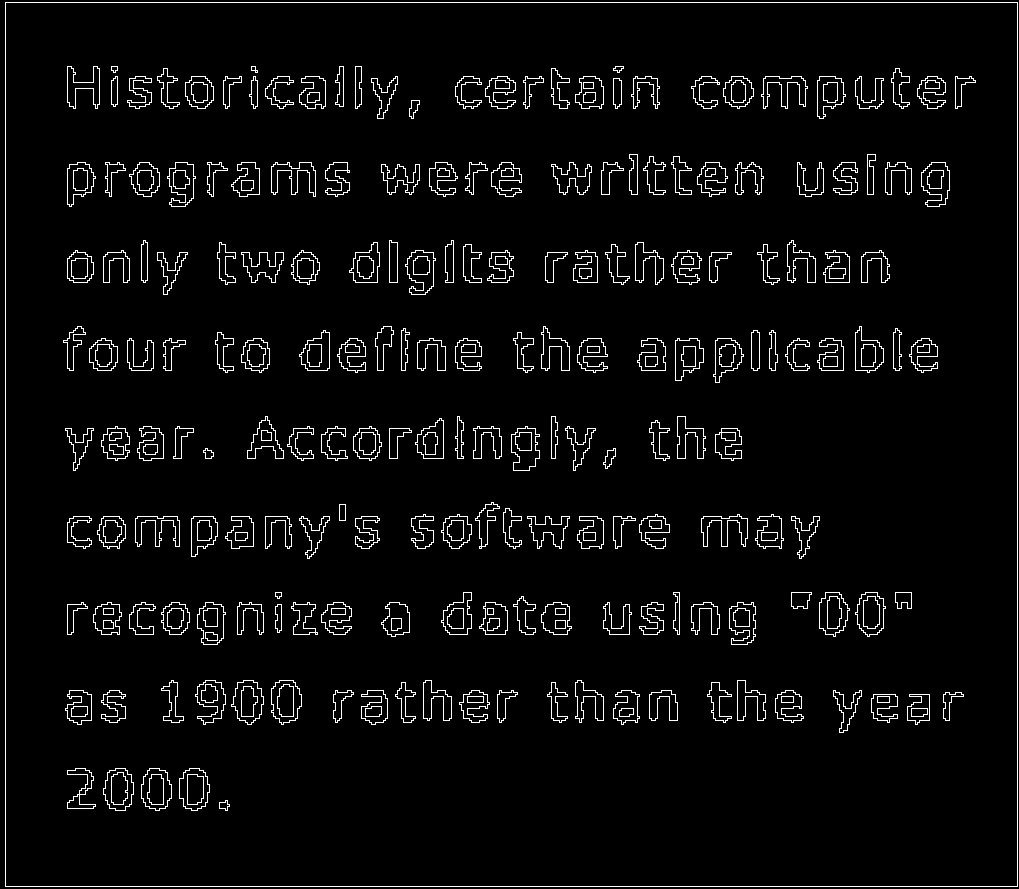

In [ ]:
# Morphological Gradient
# gradient: the outline of the object
kernel = np.ones((2,2),np.uint8)
gradient_img_1 = cv2.morphologyEx(closing_img_1, cv2.MORPH_GRADIENT, kernel)
cv2_imshow(gradient_img_1)

#### 2. 

(20%) Please use linear stretching to enhance the contrast of the image “aerialview- washedout.tif.”


In [ ]:
img_2 = cv2.imread('aerialview-washedout.tif', cv2.IMREAD_COLOR)

In [ ]:
# # convert rgb image to gray image for linear stretching
# def rgb2gray(rgb):
#     return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
# gray = rgb2gray(img_2)

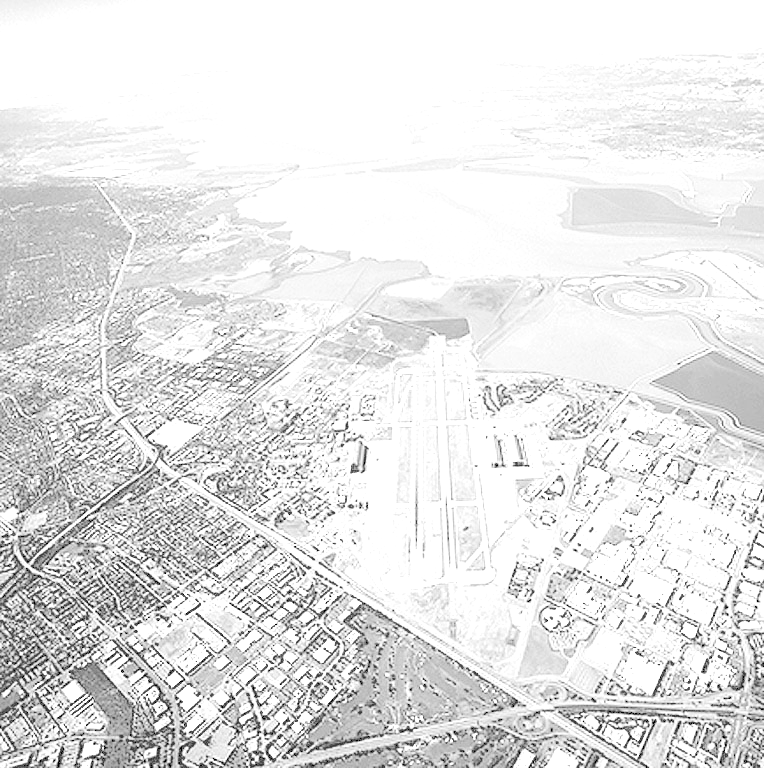

In [ ]:
# apply minmax formula on contrast enhancement using linear stretching
norm_img2 = cv2.normalize(img_2, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_img2 = np.clip(norm_img2, 0, 1)
norm_img2 = (255*norm_img2).astype(np.uint8)
# cv2_imshow(img_2)
cv2_imshow(norm_img2)

#### 3. 

(20%) Please apply global HE to “einstein-low-contrast.tif.” You should implement it by yourself WITHOUT using built-in APIs.

In [ ]:
img_3 = cv2.imread('einstein-low-contrast.tif', cv2.IMREAD_COLOR)

In [ ]:
img_3_IM = np.asarray(Image.open('einstein-low-contrast.tif'))

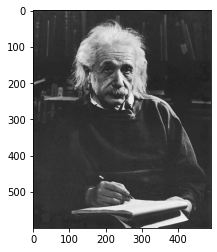

In [ ]:
plt.imshow(img_3_IM, cmap='gray')

In [ ]:
# To process image, flatten the array to 1-D
img_3_flat = img_3_IM.flatten()

(array([4.30000e+01, 2.84000e+02, 1.27580e+04, 1.31871e+05, 8.48790e+04,
        1.13380e+04, 5.35700e+03, 4.65200e+03, 3.29000e+03, 3.11600e+03,
        2.69900e+03, 2.28000e+03, 2.50700e+03, 3.13000e+03, 3.77600e+03,
        5.50300e+03, 5.37900e+03, 6.10800e+03, 4.41000e+03, 6.20000e+02]),
 array([ 74. ,  79.2,  84.4,  89.6,  94.8, 100. , 105.2, 110.4, 115.6,
        120.8, 126. , 131.2, 136.4, 141.6, 146.8, 152. , 157.2, 162.4,
        167.6, 172.8, 178. ]),
 <a list of 20 Patch objects>)

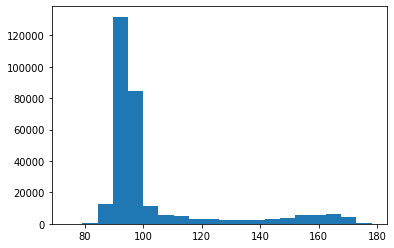

In [ ]:
plt.hist(img_3_flat, bins=20)

In [ ]:
def hist(image, bins):
    histogram = np.zeros(bins)
    for idx in range(len(image)):
        histogram[image[idx]]+=1
    return histogram

hist = hist(img_3_flat, 256)

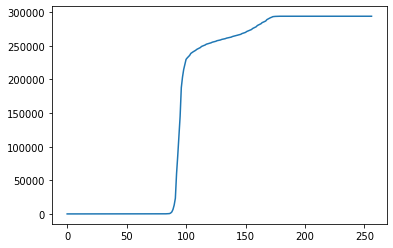

In [ ]:
# compute cumulate sum
def cumsum(input):
    inp = [next(iter(input))]
    for idx in iter(input):
        inp.append(inp[-1] + idx)
    return np.array(inp)

cunsum = cumsum(hist)
plt.plot(cunsum)

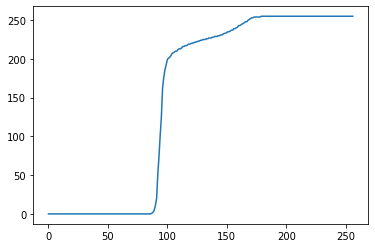

In [ ]:
nj = (cunsum - cunsum.min()) * 255
N = cunsum.max() - cunsum.min()

cunsum = nj / N
cunsum = cunsum.astype('uint8')
plt.plot(cunsum)

(array([13085.,     0., 10166., 36401.,     0.,     0.,     0.,     0.,
            0.,     0., 26796.,     0.,     0.,     0., 30370.,     0.,
            0.,     0.,     0., 28138.,     0.,     0.,     0.,     0.,
        42848.,     0.,     0.,     0.,     0.,     0.,     0., 15606.,
            0.,     0., 11385.,     0.,  7451.,  7589.,     0.,  5893.,
         5445.,  6228.,  5517.,  5466.,  5866.,  5727.,  5784.,  6256.,
         6953.,  5030.]),
 array([  0.  ,   5.08,  10.16,  15.24,  20.32,  25.4 ,  30.48,  35.56,
         40.64,  45.72,  50.8 ,  55.88,  60.96,  66.04,  71.12,  76.2 ,
         81.28,  86.36,  91.44,  96.52, 101.6 , 106.68, 111.76, 116.84,
        121.92, 127.  , 132.08, 137.16, 142.24, 147.32, 152.4 , 157.48,
        162.56, 167.64, 172.72, 177.8 , 182.88, 187.96, 193.04, 198.12,
        203.2 , 208.28, 213.36, 218.44, 223.52, 228.6 , 233.68, 238.76,
        243.84, 248.92, 254.  ]),
 <a list of 50 Patch objects>)

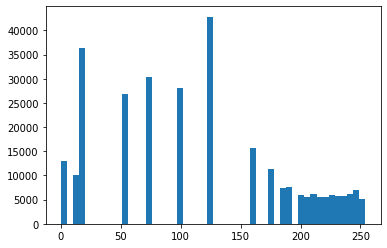

In [ ]:
# new histogram after normalization
img_new = cunsum[img_3_flat]
plt.hist(img_new, bins=50)

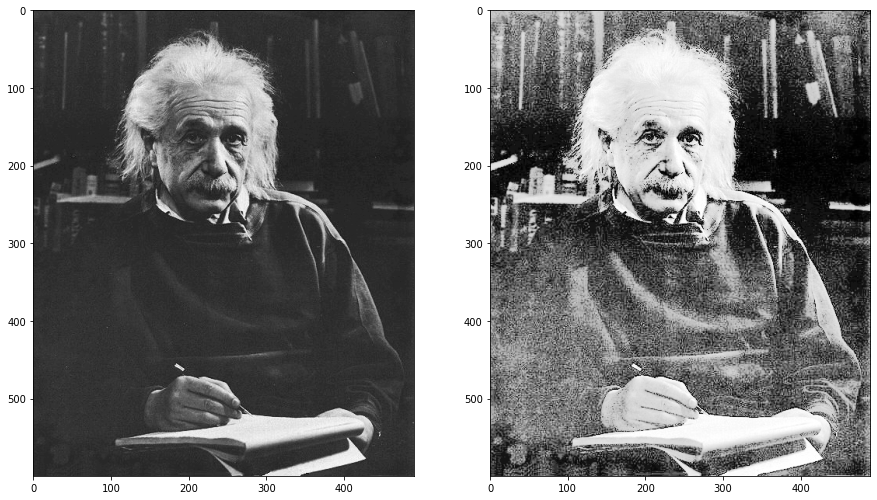

In [ ]:
new_img = cunsum[img_3_flat]
new_img = np.reshape(img_new, img_3_IM.shape) # reshape to original shape
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img_3_IM, cmap='gray')

fig.add_subplot(1,2,2)
plt.imshow(new_img, cmap='gray')
plt.show(block=True)